In [1]:
import numpy as np

from scipy.linalg import inv
from numpy.linalg import eig
from numpy.linalg import matrix_rank

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data_train = np.load('data/fashion_train.npy', mmap_mode='r')
data_test = np.load('data/fashion_test.npy', mmap_mode='r')

In [3]:
X_train = data_train[:, :-1]
y_train = data_train[:, -1]


In [32]:
class LDA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        
        means = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))

        for c in class_labels:
            # Find within class scatter matrix
            X_c = X[y==c]
            mean_c = np.mean(X_c, axis=0)

            # Sum of SW_c
            SW += (X_c -mean_c).T.dot((X_c-mean_c))

            # Find between class scatter matrix
            n_c = X_c.shape[0]
            mean_diff = (mean_c - means).reshape(n_features,1)

            # Sum of SB
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Find the inverse of SW
        SW_inv = inv(SW)

        # Find SW^-1SB
        A = SW_inv.dot(SB)

        # Find the eigenvectors and eigenvalues of A
        eigenvalues, eigenvectors = eig(A)
        eigenvectors = eigenvectors.T

        # Get indexes of maximum eigenvalues
        idx = np.argsort(eigenvalues.real)[::-1]

        # Get sorted eigenvalues and eigenvectors
        eigenvalues, eigenvectors = eigenvalues[idx], eigenvectors[idx].real

        # Save the n first eigenvectors
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

In [33]:
clf = LDA(n_components=2)
clf.fit(X_train, y_train)
transformed_X_train= clf.transform(X_train)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

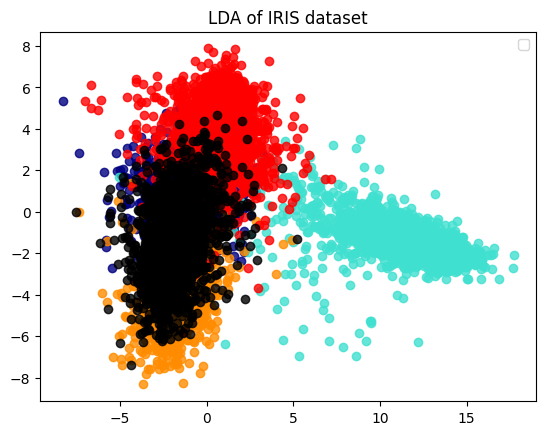

In [34]:
plt.figure()
colors = ["navy", "turquoise", "darkorange", 'red', 'black', 'green']

lw = 2
plt.figure()
for color, i in zip(colors, [0, 1, 2, 3, 4]):
    plt.scatter(
        transformed_X_train[y_train == i, 0], transformed_X_train[y_train == i, 1], alpha=0.8, color=color
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

In [20]:
np.mean(X_train, axis=0).shape

(784,)

In [21]:
n_features = X_train.shape[1]
class_labels = np.unique(y_train)

In [101]:
means = np.mean(X_train, axis=0)
SW = np.zeros((n_features, n_features))
SB = np.zeros((n_features, n_features))

for c in class_labels:
    # Find within class scatter matrix
    X_c = X_train[y_train==c]
    mean_c = np.mean(X_c, axis=0)

    # Sum of SW_c
    SW += (X_c -mean_c).T.dot((X_c-mean_c))

    # Find between class scatter matrix
    n_c = X_c.shape[0]
    mean_diff = (mean_c - means).reshape(n_features, 1)

    # Sum of SB
    SB += n_c * (mean_diff).dot(mean_diff.T)

# Find the inverse of SW
SW_inv = inv(SW)

# Find SW^-1SB
A = SW_inv.dot(SB)

# Find the eigenvectors and eigenvalues of A
eigenvalues, eigenvectors = eig(A)

# Get indexes of maximum eigenvalues
idx = np.argsort(eigenvalues)[::-1]

# Get sorted eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigenvalues[idx], eigenvectors[idx]

# Save the n first eigenvectors
self.linear_discriminants = eigenvectors[0:self.n_components]

In [92]:
np.argsort(eigenvalues)[::-1]

array([  0,   1,   2,   3,   6,   9,  10,  39,  37,  38,  14,  15,  42,
        43,  44,  45,  54,  55,  56,  57,  58,  94,  95,  96,  97,  52,
        53,  40,  41, 106, 107, 104, 105, 112, 113,  84,  85, 118, 119,
       120,  72,  73, 134, 135, 121, 122, 136, 137, 161, 162, 108, 109,
       159, 160, 179, 182, 183, 151, 152,  50,  51, 180, 181, 177, 178,
        82,  83, 192, 193, 114, 115, 217, 198, 199, 123, 124, 155, 156,
       147, 148, 232, 233,  48,  49, 230, 231,  88,  89, 243, 250, 238,
       239, 110, 111, 228, 229, 218, 219, 255, 256, 278,   7,   8, 196,
       197, 284, 285, 251, 252, 294, 295, 215, 216, 286, 287, 317, 318,
       311, 312, 184, 185, 269, 270, 236, 237, 339, 340, 335, 336, 257,
       258, 329, 330, 102, 103, 325, 326, 379, 380, 226, 227, 194, 195,
       265, 266, 357, 358, 369, 370, 186, 187, 315, 316, 125, 126, 388,
       389, 390, 391, 321, 322, 381, 382, 359, 360, 419, 426, 427, 319,
       320, 434, 435, 400, 401, 413, 414, 430, 431, 439, 440, 43

In [87]:
eigenvalues[5]-eigenvalues[4]

(4.0824357180007786e-14+0j)

In [85]:
eigenvalues[5]

(-9.880249428548131e-14+0j)

In [99]:
SW1 = np.zeros((n_features, n_features))

for c in class_labels:
    # Find within class scatter matrix
    X_c = X_train[y_train==c]
    SW1 += np.cov(X_c.T*X_c.shape[0]-1)


In [78]:
SW = 1/X_train.shape[0]*SW

In [100]:
np.sum(SW-SW1)

-26996073636413.11

In [80]:
SW

array([[3.07838853e-02, 3.05694099e-02, 3.04379552e-02, ...,
        1.88896670e-02, 1.95804038e-02, 2.10328375e-02],
       [3.05694099e-02, 5.59789523e-02, 5.44923329e-02, ...,
        1.46337701e-01, 9.37476818e-02, 4.84567364e-02],
       [3.04379552e-02, 5.44923329e-02, 1.06996971e+00, ...,
        5.89535403e-01, 3.52575812e-01, 2.21904793e-01],
       ...,
       [1.88896670e-02, 1.46337701e-01, 5.89535403e-01, ...,
        1.80894764e+02, 3.49777268e+01, 1.29789224e+00],
       [1.95804038e-02, 9.37476818e-02, 3.52575812e-01, ...,
        3.49777268e+01, 2.03485040e+01, 1.18190118e+00],
       [2.10328375e-02, 4.84567364e-02, 2.21904793e-01, ...,
        1.29789224e+00, 1.18190118e+00, 8.54969979e-01]])

In [81]:
SW1

array([[1.53264160e-01, 1.52203957e-01, 1.51555939e-01, ...,
        9.40344235e-02, 9.74598207e-02, 1.04714453e-01],
       [1.52203957e-01, 2.77652263e-01, 2.70804589e-01, ...,
        7.29986829e-01, 4.67335517e-01, 2.41264111e-01],
       [1.51555939e-01, 2.70804589e-01, 5.31298163e+00, ...,
        2.94457368e+00, 1.76133298e+00, 1.10874288e+00],
       ...,
       [9.40344235e-02, 7.29986829e-01, 2.94457368e+00, ...,
        9.03175709e+02, 1.74765955e+02, 6.48007006e+00],
       [9.74598207e-02, 4.67335517e-01, 1.76133298e+00, ...,
        1.74765955e+02, 1.01671932e+02, 5.89991447e+00],
       [1.04714453e-01, 2.41264111e-01, 1.10874288e+00, ...,
        6.48007006e+00, 5.89991447e+00, 4.26439902e+00]])

In [161]:
img = X_train[0].reshape(28,28)

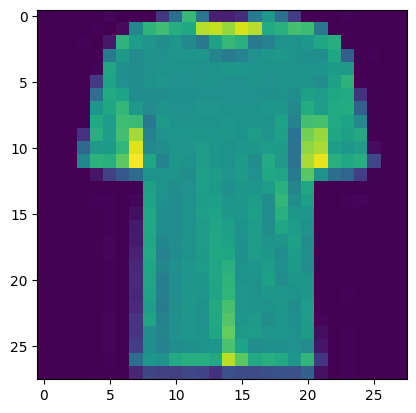

In [162]:
plt.imshow(img)